In [ ]:
#ここまで特徴量作成
df_train2 = df_train.copy()#lgbm用にコピー
df_test2 = df_test.copy()#lgbm用にコピー

In [ ]:
#カテゴリ型に変換するカラムのリスト
category_cols =["TypeofContact_binary","TypeofContact_oe","CityTier_reverse","Gender_0","Passport", "material_count","PreferredPropertyStar",
                "car_status_count","child_info_cat",'MonthlyIncome_binned','Age_numeric_binned',"Occupation_oe",'cluster_test']




# カテゴリ型に変換
df_train2[category_cols] = df_train2[category_cols].astype('category')
df_test2[category_cols] = df_test2[category_cols].astype('category')

In [ ]:
x_train2 = df_train2.drop(columns = ["ProdTaken", "id"])
y_train  = df_train2["ProdTaken"]
id_train = df_train2["id"]

In [ ]:
print("mean: {:.4f}".format(y_train.mean()))
y_train.value_counts()

mean: 0.1424


,count
ProdTaken,
0.0,2992
1.0,497


In [ ]:
cv = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=123).split(x_train2, y_train))

print("index(train):", cv[0][0])
print("index(valid):", cv[0][1])

index(train): [   1    2    3 ... 3484 3485 3487]
index(valid): [   0    4    7    8   22   25   40   45   46   50   51   54   59   60
   61   66   69   71   73   75   88   93   97  105  107  109  124  134
  135  138  144  149  158  161  162  174  177  184  187  191  198  202
  205  214  218  220  228  244  252  259  260  262  268  269  272  275
  286  292  302  304  310  317  320  330  345  366  371  376  380  386
  394  400  431  432  435  436  450  456  458  463  469  472  473  475
  478  484  514  524  529  534  536  537  540  545  547  557  561  579
  583  591  597  600  601  604  613  615  621  628  630  634  641  642
  644  647  654  667  671  679  684  692  693  695  697  701  715  722
  724  726  730  741  742  745  747  752  757  762  763  775  778  785
  786  790  795  796  799  835  836  841  844  846  856  857  859  863
  864  868  874  876  877  878  881  882  888  890  893  899  907  917
  930  938  939  941  952  954  955  959  960  973  974  978  980  984
  990  991  9

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        3489 non-null   int64   
 1   Age                       3489 non-null   category
 2   TypeofContact             3483 non-null   category
 3   CityTier                  3489 non-null   int64   
 4   DurationOfPitch           3489 non-null   category
 5   Occupation                3489 non-null   category
 6   Gender                    3489 non-null   category
 7   NumberOfPersonVisiting    3489 non-null   float64 
 8   NumberOfFollowups         3456 non-null   float64 
 9   ProductPitched            3489 non-null   category
 10  PreferredPropertyStar     3489 non-null   float64 
 11  NumberOfTrips             3489 non-null   category
 12  Passport                  3489 non-null   int64   
 13  PitchSatisfactionScore    3489 non-null   int64 

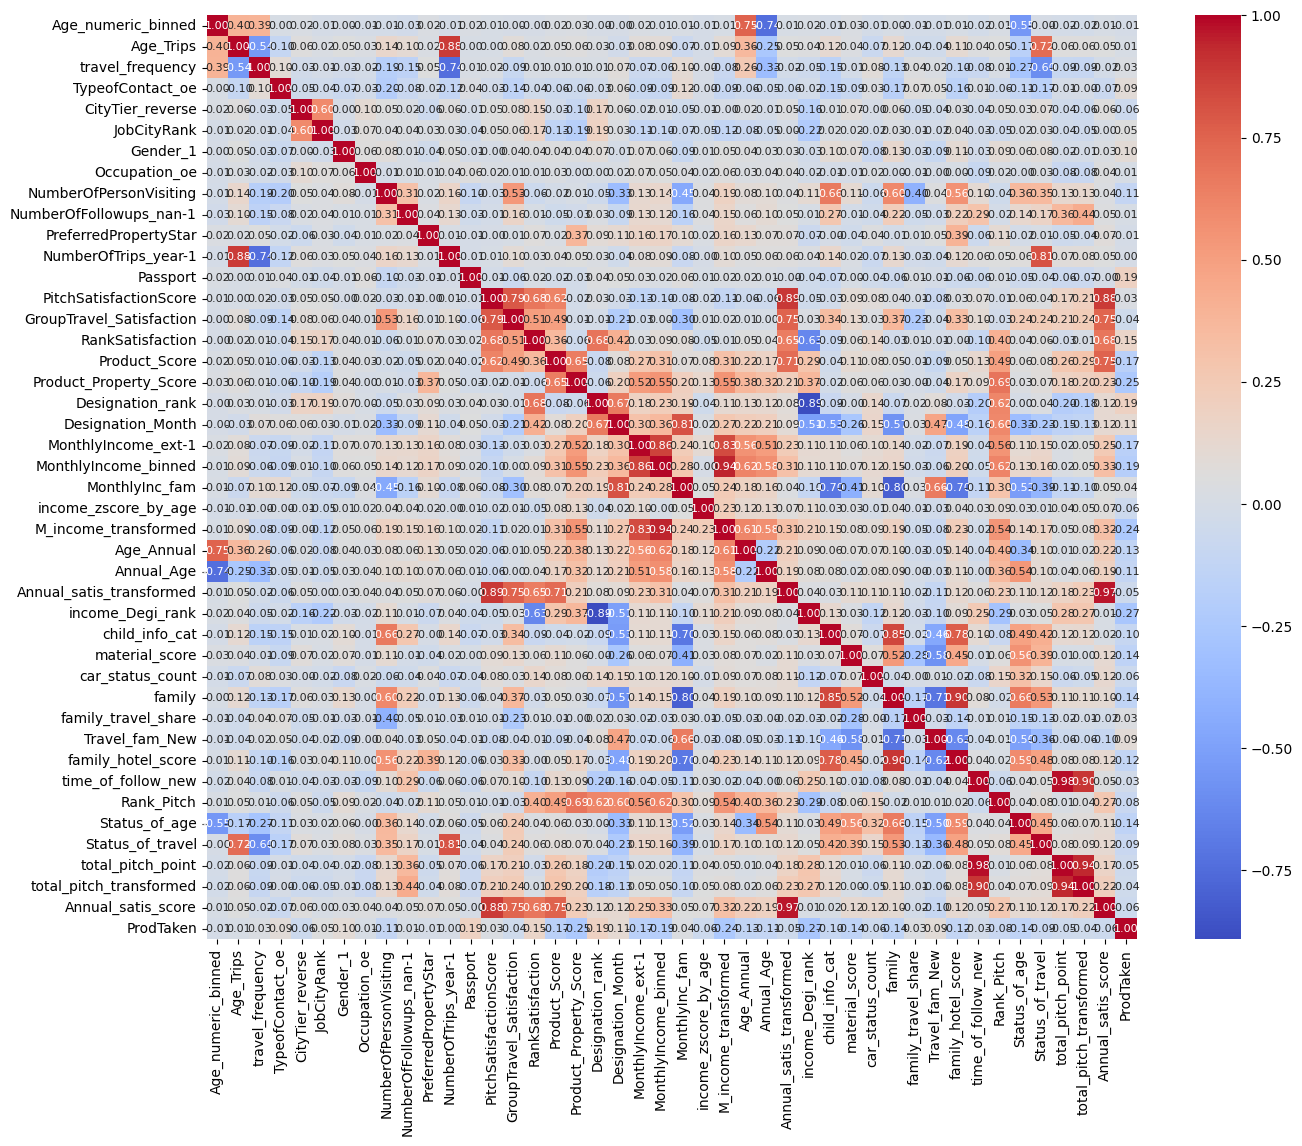

In [ ]:
selected_cols = ["Age_numeric_binned","Age_Trips","travel_frequency","TypeofContact_oe","CityTier_reverse",
                     "JobCityRank","Gender_1", "Occupation_oe", "NumberOfPersonVisiting", "NumberOfFollowups_nan-1", "PreferredPropertyStar",
                     "NumberOfTrips_year-1","Passport", "PitchSatisfactionScore",
                     "GroupTravel_Satisfaction", "RankSatisfaction", "Product_Score", "Product_Property_Score",
                     "Designation_rank", "Designation_Month","MonthlyIncome_ext-1", "MonthlyIncome_binned", "MonthlyInc_fam",
                     "income_zscore_by_age", "M_income_transformed", "Age_Annual", "Annual_Age","Annual_satis_transformed",
                     "income_Degi_rank","child_info_cat", "material_score", "car_status_count","family","family_travel_share",
                     "Travel_fam_New", "family_hotel_score", "time_of_follow_new", "Rank_Pitch", "Status_of_age", "Status_of_travel",
                      "total_pitch_point","total_pitch_transformed","Annual_satis_score","ProdTaken"]

# 選択したカラムで相関行列を計算
corr_matrix = df_train[selected_cols].corr()

plt.figure(figsize=(15, 12))  # サイズを大きく
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.show()


In [ ]:
 #ベースライン特徴量選択
x_train = x_train2[["Age_numeric_binned","Age_Trips","travel_frequency","TypeofContact_oe","CityTier_reverse",
                     "JobCityRank","Gender_1", "Occupation_oe", "NumberOfPersonVisiting", "NumberOfFollowups_nan-1", "PreferredPropertyStar",
                     "NumberOfTrips_year-1","Passport", "PitchSatisfactionScore",
                     "GroupTravel_Satisfaction", "RankSatisfaction", "Product_Score", "Product_Property_Score",
                     "Designation_rank", "Designation_Month","MonthlyIncome_ext-1", "MonthlyIncome_binned", "MonthlyInc_fam",
                     "income_zscore_by_age", "M_income_transformed", "Age_Annual", "Annual_Age","Annual_satis_transformed",
                     "income_Degi_rank","child_info_cat", "material_score", "car_status_count","family","family_travel_share",
                     "Travel_fam_New", "family_hotel_score", "time_of_follow_new", "Rank_Pitch", "Status_of_age", "Status_of_travel",
                      "total_pitch_point","total_pitch_transformed","Annual_satis_score",]]

In [ ]:
cv =  list(StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123).split(x_train, y_train))

nfold = 0
idx_tr, idx_va = cv[nfold][0], cv[nfold][1]

x_tr, y_tr, id_tr = x_train.loc[idx_tr, :], y_train[idx_tr], id_train[idx_tr]
x_va, y_va, id_va = x_train.loc[idx_va, :], y_train[idx_va], id_train[idx_va]

print(x_tr.shape, y_tr.shape, id_tr.shape)
print(x_va.shape, y_va.shape, id_va.shape)

(2791, 43) (2791,) (2791,)
(698, 43) (698,) (698,)


In [ ]:
# ベースラインパラメータの設定
params = {
"boosting_type" : "gbdt",
    "objective": "binary",
    "metric": "auc",
    "categorical_feature": ["TypeofContact_oe","Occupation_oe","CityTier_reverse","Gender_0","Passport","PreferredPropertyStar",
                "car_status_count","MonthlyIncome_binned","child_info_cat", "material_score",],
    "learning_rate": 1,
    "num_leaves": 64,
    'lambda_l1': 0.1,
    'lambda_l2': 20,
    "min_data_in_leaf": 50,
    "max_depth": 1,
    "n_estimators": 3000,
    "feature_fraction": 0.7,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "subsample_freq": 2,
    "subsample": 0.7,
    "random_state": 123,
    "importance_type": "gain",
    "early_stopping_rounds": 100,
    "verbose": -1,
}

model_lgb_base = lgb.LGBMClassifier(**params)
model_lgb_base.fit(x_tr,y_tr,
          eval_set = [(x_tr, y_tr), (x_va, y_va)],)

with open("model_lgb_base_fold0.pickle", "wb") as f:
     pickle.dump(model_lgb_base, f, protocol=4)

In [ ]:
x_tr_pred = model_lgb_base.predict_proba(x_tr)[:,1]
metric_tr = roc_auc_score(y_tr, x_tr_pred)

y_va_pred = model_lgb_base.predict_proba(x_va)[:,1]
metric_va = roc_auc_score(y_va, y_va_pred)

metrics = []

metrics.append([nfold, metric_tr, metric_va])

print("[auc] tr:{:.4f}, va:{:.4f}".format(metric_tr, metric_va))

[auc] tr:0.8674, va:0.8641


In [ ]:
#OOFの推論値を入れる
train_oof = np.zeros(len(x_train))
#検証データのindexに推論値を格納
train_oof[idx_va] = y_va_pred

In [ ]:
#重要度の取得
imp_fold = pd.DataFrame({"col": x_train.columns, "imp": model_lgb_base.feature_importances_, "nfold": nfold})
#確認上10個
display(imp_fold.sort_values("imp", ascending = False)[:40])

#重要度を格納する5fold用データフレームの作成
imp = pd.DataFrame()
#imp_foldを5fold用データフレームに結合
imp = pd.concat([imp, imp_fold])

,col,imp,nfold
18,Designation_rank,186.770996,0
12,Passport,60.230559,0
30,material_score,32.692402,0
4,CityTier_reverse,32.414731,0
19,Designation_Month,31.305330,0
38,Status_of_age,27.122580,0
21,MonthlyIncome_binned,27.023399,0
6,Gender_1,24.791901,0
28,income_Degi_rank,17.831700,0
27,Annual_satis_transformed,17.195110,0


In [ ]:
#リスト型をarray型に変換
metrics = np.array(metrics)
print(metrics)

#学習検証データの評価値の平均値と標準偏差を算出
print("[cv] tr:{:.4f}+-{:.4f}, va:{:.4f}+-{:.4f}".format(
  metrics[:, 1].mean(), metrics[:,1].std(),
  metrics[:, 2].mean(), metrics[:, 2].std(),))

#oofの評価値を算出
print("[oof] tr:{:.4f}".format(roc_auc_score(y_train, train_oof)))

[[0.         0.86741097 0.86413043]]
[cv] tr:0.8674+-0.0000, va:0.8641+-0.0000
[oof] tr:0.5153


In [ ]:
train_oof = pd.concat([
    id_train,pd.DataFrame({"true": y_train, "pred": train_oof}),
], axis = 1)
train_oof.head()

,id,true,pred
0,0,1.0,0.946336
1,1,0.0,0.000000
2,2,1.0,0.000000
3,3,0.0,0.000000
4,4,1.0,0.587079


In [ ]:
imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop = False)
imp.columns = ["col", "imp", "imp_std"]
imp.head()

,col,imp,imp_std
0,Age_Annual,4.95340,NaN
1,Age_Trips,7.56099,NaN
2,Age_numeric_binned,6.54553,NaN
3,Annual_Age,2.88765,NaN
4,Annual_satis_score,2.80742,NaN


In [ ]:
def train_lgb(input_x,
             input_y,
             input_id,
             params,
             list_nfold = [0, 1, 2, 3, 4,],
             n_splits = 5,):
    train_oof2 = np.zeros(len(input_x))
    metrics = []
    imp = pd.DataFrame()

    #cross-validationはfold4とfold5への分割のバランスが悪かったため、StratifiedGroupKFoldへ変更
    cv = list(StratifiedGroupKFold(n_splits = n_splits, shuffle = True, random_state = 123).
        split(input_x, input_y, groups= df_train2["Age_numeric_0_med"].values))
    for nfold in list_nfold:
        print("-"*20,nfold in list_nfold, "-"*20)

    #make dataset
        idx_tr, idx_va = cv[nfold][0],cv[nfold][1]
        x_tr, y_tr, id_tr = input_x.loc[idx_tr, :], input_y[idx_tr], input_id.iloc[idx_tr]
        x_va, y_va, id_va = input_x.loc[idx_va, :], input_y[idx_va], input_id.iloc[idx_va]
        print(x_tr.shape, x_va.shape)

        #train
        model_lgb = lgb.LGBMClassifier(**params)
        model_lgb.fit(x_tr,
             y_tr,
             eval_set = [(x_tr, y_tr), (x_va, y_va)],)
             #early_stopping_rounds = 100,
             #verbose = 100
        fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
        with open(fname_lgb, "wb") as f:
            pickle.dump(model_lgb, f, protocol =4)
        #evaluate
        y_tr_pred = model_lgb.predict_proba(x_tr)[:,1]
        y_va_pred = model_lgb.predict_proba(x_va)[:,1]
        metric_tr = roc_auc_score(y_tr, y_tr_pred)
        metric_va = roc_auc_score(y_va, y_va_pred)
        metrics.append([nfold, metric_tr, metric_va])
        print("[auc] tr:{:.4f}, va:{:.4f}".format(metric_tr, metric_va))

        #oof
        train_oof2[idx_va] = y_va_pred

        #imp
        _imp = pd.DataFrame({"col":input_x.columns, "imp":model_lgb.feature_importances_,
                        "nfold":nfold})
        imp = pd.concat([imp, _imp])

    print("-"*20, "result", "-"*20)
    # metric
    metrics = np.array(metrics)
    print(metrics)
    print("[cv]tr:{:.4f}+-{:.4f}, va:{:.4f}+-{:.4f}".format(
    metrics[:,1].mean(), metrics[:,1].std(),
    metrics[:,2].mean(), metrics[:,2].std(),))
    print("[oof] {:.4f}".format(
    roc_auc_score(input_y, train_oof2)))

    #oof
    train_oof2 = pd.concat([
        input_id,
        pd.DataFrame({"pred": train_oof2})],axis = 1)
    #importance
    imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop=False)
    imp.columns = ["col", "imp", "imp_std"]

    return train_oof2, imp, metrics

In [ ]:
#パラメーターチューニングと実行
params = {
    "boosting_type" : "gbdt",
    "objective": "binary",
    "metric": "auc",
    "categorical_feature": ['CityTier_reverse','Passport','cluster_test',"TypeofContact_oe","CityTier_reverse","Gender_0",
                       "Occupation_oe", "child_info_int", "material_count",],
    #"class_weight": "balanced",
   "learning_rate": 1,
    "num_leaves": 32,
    'lambda_l1': 1,
    'lambda_l2': 30,
    "min_data_in_leaf": 20,
    "max_depth": 1,
    "n_estimators": 5000,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "subsample_freq": 2,
    "subsample": 0.7,
    "random_state": 123,
    "importance_type": "gain",
    "early_stopping_rounds": 30,
    "verbose": -1,}


#学習の実行
train_oof2, imp, metrics = train_lgb(x_train,
                                   y_train,
                                   id_train,
                                   params,
                                   list_nfold = [0,1,2,3,4],
                                   n_splits = 5,
                                   )

-------------------- True --------------------
(2742, 43) (747, 43)
[auc] tr:0.8451, va:0.8485
-------------------- True --------------------
(2744, 43) (745, 43)
[auc] tr:0.8758, va:0.8110
-------------------- True --------------------
(2896, 43) (593, 43)
[auc] tr:0.8410, va:0.8286
-------------------- True --------------------
(2764, 43) (725, 43)
[auc] tr:0.8433, va:0.8191
-------------------- True --------------------
(2810, 43) (679, 43)
[auc] tr:0.8797, va:0.8359
-------------------- result --------------------
[[0.         0.84508919 0.84854648]
 [1.         0.87581449 0.81098915]
 [2.         0.84101771 0.82862054]
 [3.         0.84328519 0.8191201 ]
 [4.         0.87972413 0.83586283]]
[cv]tr:0.8570+-0.0171, va:0.8286+-0.0130
[oof] 0.8268


In [ ]:
train_oof2.head()

,id,pred
0,0,0.788921
1,1,0.120518
2,2,0.358037
3,3,0.048117
4,4,0.568481


In [ ]:
imp.sort_values("imp", ascending = False)[:40]

,col,imp,imp_std
23,Product_Property_Score,177.797661,11.675970
20,Passport,51.826997,9.736175
12,M_income_transformed,36.502357,19.276668
6,CityTier_reverse,31.015600,6.180893
38,material_score,25.606037,16.648904
36,income_Degi_rank,22.225764,20.670530
9,Gender_1,18.218750,1.914060
25,RankSatisfaction,12.193050,6.926498
7,Designation_Month,11.966036,10.414030
27,Status_of_age,10.845084,9.050950


In [ ]:
#テストデータへの推論、データセット作成
x_test2 = df_test2.drop(columns = ["ProdTaken","id"])
id_test = df_test2["id"]

In [ ]:
#x_test に対して特徴量選択
x_test2 = x_train[["Age_numeric_binned","Age_Trips","travel_frequency","TypeofContact_oe","CityTier_reverse",
                     "JobCityRank","Gender_1", "Occupation_oe", "NumberOfPersonVisiting", "NumberOfFollowups_nan-1", "PreferredPropertyStar",
                     "NumberOfTrips_year-1","Passport", "PitchSatisfactionScore",
                     "GroupTravel_Satisfaction", "RankSatisfaction", "Product_Score", "Product_Property_Score",
                     "Designation_rank", "Designation_Month","MonthlyIncome_ext-1", "MonthlyIncome_binned", "MonthlyInc_fam",
                     "income_zscore_by_age", "M_income_transformed", "Age_Annual", "Annual_Age","Annual_satis_transformed",
                     "income_Degi_rank","child_info_cat", "material_score", "car_status_count","family","family_travel_share",
                     "Travel_fam_New", "family_hotel_score", "time_of_follow_new", "Rank_Pitch", "Status_of_age", "Status_of_travel",
                      "total_pitch_point","total_pitch_transformed","Annual_satis_score",]]

In [ ]:
with open("model_lgb_base_fold0.pickle", "rb") as f:
    model_lgb_base = pickle.load(f)

In [ ]:
#推論
test_pred_fold = model_lgb_base.predict_proba(x_test2)[:,1]

#推論値を格納する変数を作成
test_pred = np.zeros((len(x_test2), 5))

#1-fold目の推論値を格納
test_pred[:, 0] = test_pred_fold

In [ ]:
#各foldの推論値の平均値を算出
test_pred_mean = test_pred.mean(axis = 1)

#推論値のデータフレームを作成
df_test_pred = pd.concat([
id_test,
pd.DataFrame({"pred" :test_pred_mean}),
],axis = 1)
df_test_pred.head()

,id,pred
0,3489,0.189267
1,3490,0.029878
2,3491,0.057586
3,3492,0.013717
4,3493,0.117416


In [ ]:
#推論関数の定義

def predict_lgb(input_x,
               input_id,
               list_nfold = [0,1, 2, 3, 4],
               ):
    pred = np.zeros((len(input_x), len(list_nfold)))
    for nfold in list_nfold:
        print("-"*20, nfold, "-"*20)
        fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
        with open(fname_lgb, "rb") as f:
            model1 = pickle.load(f)
        pred[:, nfold] = model1.predict_proba(input_x)[:,1]

    pred = pd.concat([
        input_id,
        pd.DataFrame({"pred": pred.mean(axis = 1)}),
    ], axis = 1)

    print("Done.")

    return pred

In [ ]:
test_pred2 = predict_lgb(x_test2, id_test,
                       list_nfold = [0, 1, 2, 3, 4],)

-------------------- 0 --------------------
-------------------- 1 --------------------
-------------------- 2 --------------------
-------------------- 3 --------------------
-------------------- 4 --------------------
Done.


In [ ]:
test_pred2.head()

,id,pred
0,3489,0.857267
1,3490,0.131791
2,3491,0.223341
3,3492,0.055673
4,3493,0.517162


In [ ]:
df_submit_lgb_base = pd.read_csv("sample_submit.csv", header = None)
df_submit_lgb_base.tail()

,0,1
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451
3488,6977,0.119451


In [ ]:
df_submit_lgb_base[1] = test_pred2["pred"]

print(df_submit_lgb_base.shape)
display(df_submit_lgb_base.head())

#ファイル出力(ベースラインsubmit)
#df_submit_lgb.to_csv("sample_submit.csv", index = None)

(3489, 2)


,0,1
0,3489,0.870809
1,3490,0.141086
2,3491,0.221175
3,3492,0.064680
4,3493,0.554873


In [ ]:
df_train2.info(verbose  = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        3489 non-null   int64   
 1   Age                       3489 non-null   category
 2   TypeofContact             3483 non-null   category
 3   CityTier                  3489 non-null   int64   
 4   DurationOfPitch           3489 non-null   category
 5   Occupation                3489 non-null   category
 6   Gender                    3489 non-null   category
 7   NumberOfPersonVisiting    3489 non-null   float64 
 8   NumberOfFollowups         3456 non-null   float64 
 9   ProductPitched            3489 non-null   category
 10  PreferredPropertyStar     3489 non-null   category
 11  NumberOfTrips             3489 non-null   category
 12  Passport                  3489 non-null   category
 13  PitchSatisfactionScore    3489 non-null   int64 

In [ ]:
#特徴量選択・確定
df_train3 = df_train2[["TypeofContact_oe","CityTier_reverse","Designation_rank","family",
"Gender_0","NumberOfPersonVisiting","NumberOfFollowups_max","income_zscore_by_age","Age_Annual","AnnualIncome_rounded",
"ProductPitched_Score","PitchSatisfactionScore","Product_Score","Passport", "material_count","child_info_int","NumberOfTrips_year",
"PreferredPropertyStar","time_of_follow_new","car_status_count","Travel_fam_New","travel_frequency","Rank_Pitch","Status_of_travel",
                    "Occupation_rank", "JobCityRank", "GroupTravel_Satisfaction","M_income_transformed","Age_ann_transformed", "Age_nume_transformed",
                      'RankSatisfaction', 'cluster_test',]]

In [ ]:
x_train2 = df_train3
y_train  = df_train2["ProdTaken"]
id_train = df_train2["id"]

In [ ]:
#学習の実行
train_oof2, imp, metrics = train_lgb(x_train2,
                                   y_train,
                                   id_train,
                                   params,
                                   list_nfold = [0,1,2,3,4],
                                   n_splits = 5,
                                   )

-------------------- True --------------------
(2742, 32) (747, 32)
[auc] tr:0.8486, va:0.8598
-------------------- True --------------------
(2744, 32) (745, 32)
[auc] tr:0.8513, va:0.8108
-------------------- True --------------------
(2896, 32) (593, 32)
[auc] tr:0.8436, va:0.8284
-------------------- True --------------------
(2764, 32) (725, 32)
[auc] tr:0.8326, va:0.8301
-------------------- True --------------------
(2810, 32) (679, 32)
[auc] tr:0.8535, va:0.8336
-------------------- result --------------------
[[0.         0.84862651 0.85976193]
 [1.         0.85127524 0.81078588]
 [2.         0.84358675 0.82837496]
 [3.         0.8326109  0.83011885]
 [4.         0.85350972 0.83358457]]
[cv]tr:0.8459+-0.0074, va:0.8325+-0.0157
[oof] 0.8330


In [ ]:
imp.sort_values("imp", ascending = False)[:40]

,col,imp,imp_std
17,ProductPitched_Score,174.534799,14.632370
26,cluster_test,46.696771,20.102993
3,AnnualIncome_rounded,44.714332,5.792701
14,Passport,35.941882,19.463579
29,material_count,35.146760,11.741313
4,CityTier_reverse,28.147332,4.437395
6,Gender_0,15.794920,2.467758
12,NumberOfTrips_year,8.576892,5.852481
30,time_of_follow_new,5.995280,6.050101
23,TypeofContact_oe,5.743146,3.625254


In [ ]:
#x_test に対して特徴量選択
x_test3 = df_test2[["TypeofContact_oe","CityTier_reverse","Designation_rank","family",
"Gender_0","NumberOfPersonVisiting","NumberOfFollowups_max","income_zscore_by_age","Age_Annual","AnnualIncome_rounded",
"ProductPitched_Score","PitchSatisfactionScore","Product_Score","Passport", "material_count","child_info_int","NumberOfTrips_year",
"PreferredPropertyStar","time_of_follow_new","car_status_count","Travel_fam_New","travel_frequency","Rank_Pitch","Status_of_travel",
                    "Occupation_rank", "JobCityRank", "GroupTravel_Satisfaction","M_income_transformed","Age_ann_transformed", "Age_nume_transformed",
                    'RankSatisfaction', 'cluster_test',]]

In [ ]:
#推論関数の実行

def predict_lgb3(input_x,
               input_id,
               list_nfold = [0,1, 2, 3, 4],
               ):
    pred = np.zeros((len(input_x), len(list_nfold)))
    for nfold in list_nfold:
        print("-"*20, nfold, "-"*20)
        fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
        with open(fname_lgb, "rb") as f:
            model1 = pickle.load(f)
        pred[:, nfold] = model1.predict_proba(input_x)[:,1]

    pred = pd.concat([
        input_id,
        pd.DataFrame({"pred": pred.mean(axis = 1)}),
    ], axis = 1)

    print("Done.")

    return pred

In [ ]:
test_pred3 = predict_lgb3(x_test3, id_test,
                       list_nfold = [0, 1, 2, 3, 4],)

-------------------- 0 --------------------
-------------------- 1 --------------------
-------------------- 2 --------------------
-------------------- 3 --------------------
-------------------- 4 --------------------
Done.


In [ ]:
test_pred3.head()

,id,pred
0,3489,0.100035
1,3490,0.209965
2,3491,0.180354
3,3492,0.529878
4,3493,0.366559


In [ ]:
#submitファイルの読み込み
df_submit_lgb = pd.read_csv("sample_submit.csv", header = None)
df_submit_lgb.tail()

,0,1
3484,6973,0.119451
3485,6974,0.119451
3486,6975,0.119451
3487,6976,0.119451
3488,6977,0.119451


In [ ]:
df_submit_lgb[1] = test_pred3["pred"]


print(df_submit_lgb.shape)
display(df_submit_lgb.head())

#提出
df_submit_lgb.to_csv("sample_submit.csv", index = None)

(3489, 2)


,0,1
0,3489,0.100035
1,3490,0.209965
2,3491,0.180354
3,3492,0.529878
4,3493,0.366559
